## Лабараторная №1

Выканаў __Трафімаў Аляксандр__

-------

1.Построение морфологического скелета

Разработать программу построения морфологического скелета изображения и восстановления изображения по морфологическому скелету для бинарных изображений и различных (произвольных) структурирующих элементов.

 

Алгоритмы построения скелета и восстановления изображения - на стр. 19 первой части спецкурса (ссылка в описании курса).

 

В качестве исходных данных можно брать встроенные изображения из модуля skimage.data. Например:

  from skimage import data

  image = data.horse()

 

Для операций с бинарными изображениями рекомендуется использовать функции binary_dilation, binary_erosion, logical_and/or/xor из библиотек numpy и skimage.morphology.

In [1]:
import skimage
from skimage import morphology
import numpy as np
from matplotlib import pyplot as plt

In [2]:
plt.rcParams['image.cmap'] = 'gray'
plt.rcParams['font.size'] = 13
plt.rcParams['axes.titlesize'] = 15
plt.rcParams['figure.titlesize'] = 17

In [3]:
def show_images(images, titles=None, cols=4, width=7, height=5, to_show_axis=False):
    rows = len(images) // cols + (1 if len(images) % cols > 0 else 0)
    fig, ax = plt.subplots(
        rows, cols, figsize=(width * cols, height * rows), squeeze=False)
    ax_flatten = ax.flatten()
    
    if titles is not None:
        if not len(images) == len(titles):
            raise ValueError('images and title must have the same len')
    
    for i in range(len(images)):
        ax_flatten[i].imshow(images[i]);
        if not to_show_axis: ax_flatten[i].axis('off')
        if titles is not None: ax_flatten[i].set_title(titles[i])
    for i in range(len(images), len(ax_flatten)):
        ax_flatten[i].set_visible(False)
    fig.tight_layout()
    fig.subplots_adjust(top=0.85)
    return fig, ax

## read image. convert from bool, invert values

In [4]:
img = skimage.data.horse()
img = ~img # invert image

False


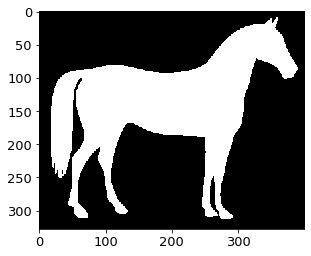

In [5]:
plt.imshow(img);
print(img[0, 0])

## examples of erosion and dilation

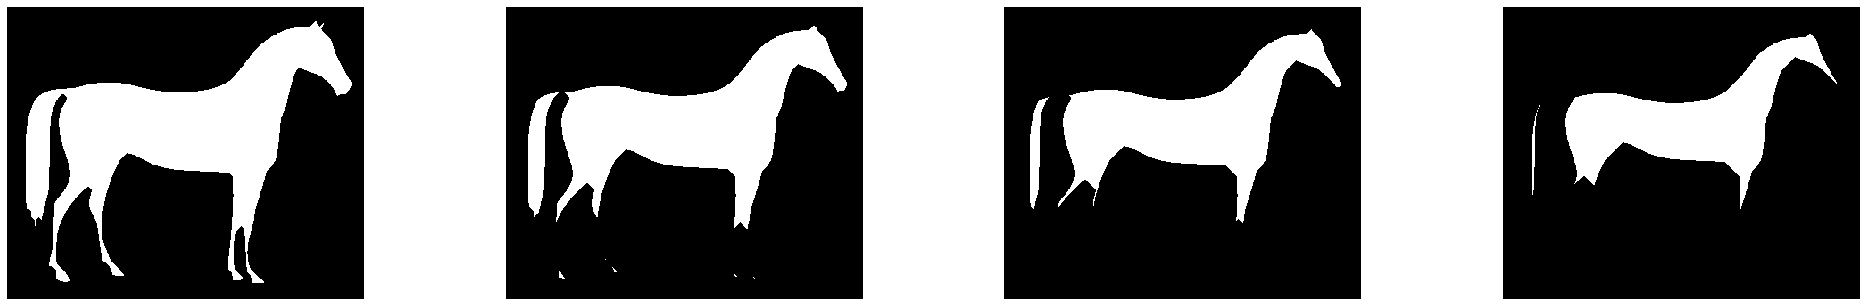

In [6]:
eroded = [morphology.binary_erosion(img, morphology.selem.diamond(r)) for r in range(3, 18, 4)]
show_images(eroded);

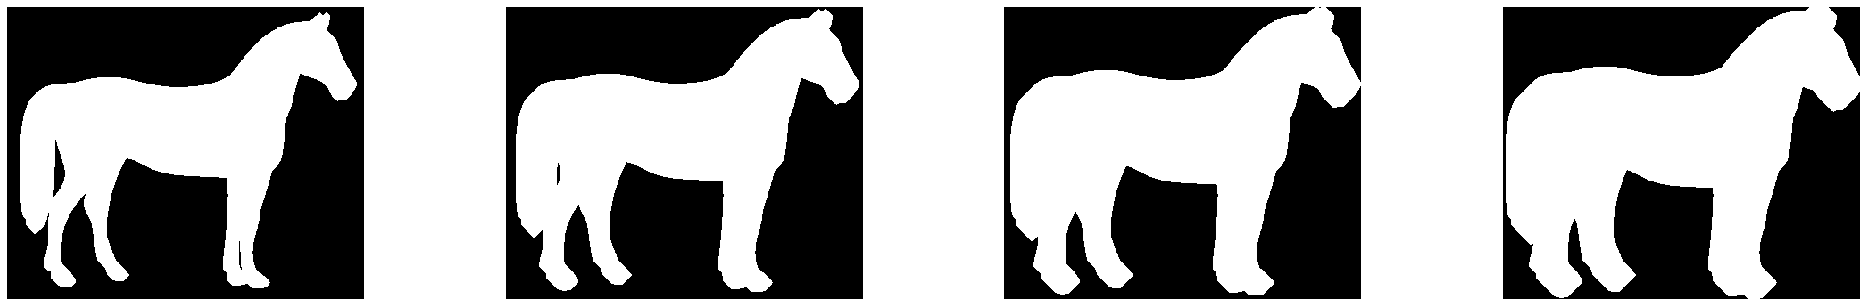

In [7]:
dilated = [morphology.binary_dilation(img, morphology.selem.diamond(r)) for r in range(3, 18, 4)]
show_images(dilated);

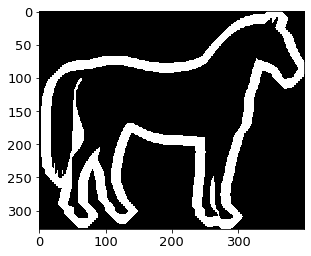

In [8]:
plt.imshow(np.logical_xor(dilated[3], img));

## show some structural elements

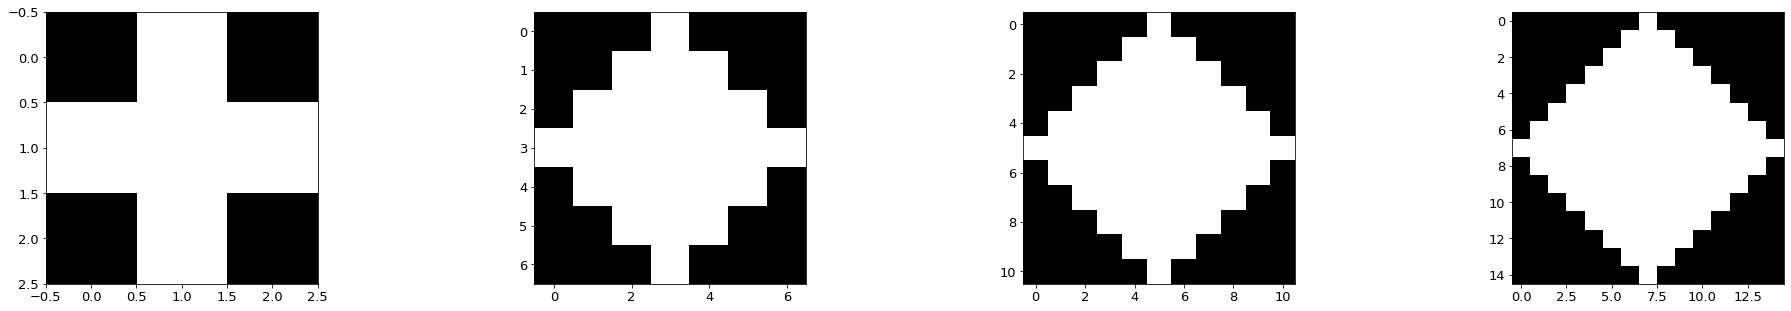

In [9]:
show_images([morphology.selem.diamond(r) for r in range(1, 9, 2)], to_show_axis=True);

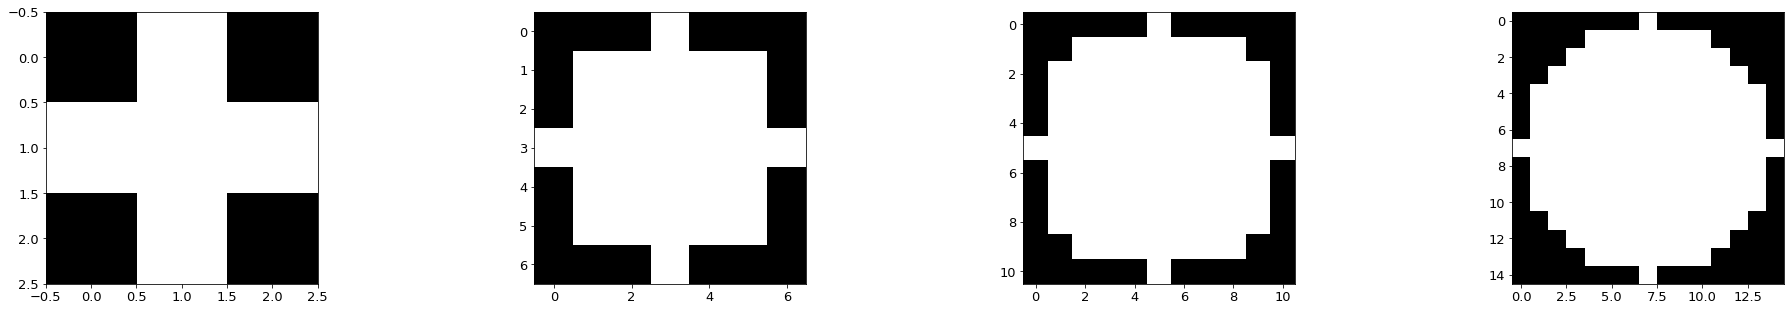

In [10]:
show_images([morphology.selem.disk(r) for r in range(1, 9, 2)], to_show_axis=True);

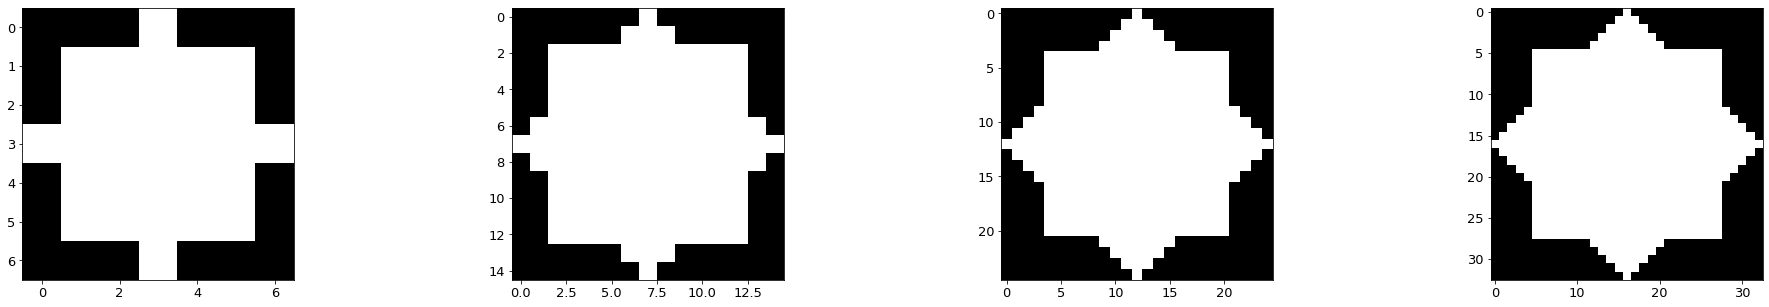

In [11]:
show_images([morphology.selem.star(r) for r in range(2, 12, 3)], to_show_axis=True);

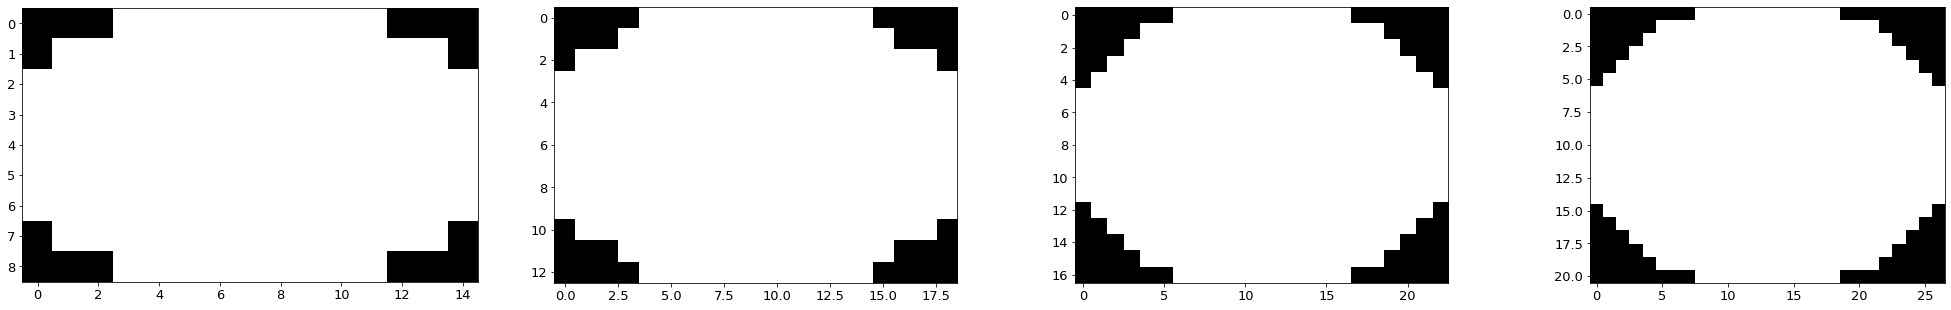

In [12]:
show_images([morphology.selem.ellipse(r, r - 3) for r in range(7, 14, 2)], to_show_axis=True);

## define functions

In [13]:
def skeletonization(img, selem, to_show_steps=False):
    n = 0
    s = []
    y1 = img.copy()

    while True:
        n += 1
        y2 = morphology.binary_erosion(y1, selem)
        if np.sum(y2) == 0:
            s.append(y1)
            break
        y3 = morphology.binary_dilation(y2, selem)
        diff = np.logical_xor(y1, y3)
        s.append(diff)
        y1 = y2
    
    skeleton = np.zeros_like(img, dtype=np.bool)
    for _s in s:
        skeleton = np.logical_or(skeleton, _s)
    
    if to_show_steps:
        fig, ax = show_images(s, cols=3);
        fig.suptitle('steps of skeletonization');

    return skeleton, s

In [14]:
def restoration(skeletonization_s, selem):
    restored = np.zeros_like(skeletonization_s[0])
    n = len(skeletonization_s)
    for k in range(n - 1, -1, -1):
        restored = np.logical_or(restored, skeletonization_s[k])
        if k > 0:
            restored = morphology.binary_dilation(restored, selem)
    return restored

In [15]:
def skeletonize_and_restore(img, selem_func, *selem_params):
    selem = selem_func(*selem_params)
    skeleton, s = skeletonization(img, selem)
    restored = restoration(s, selem)
    success = np.array_equal(img, restored)
    fig, ax = show_images([skeleton, restored], titles=['skeleton', 'restored']);
    info = f'{str(selem_func).split()[1]} {selem_params}. iterations: {len(s)}. restoration successfull: {success}'
    fig.suptitle(info, x=0.25);
    return success

## diamond

all tests succeeded: True


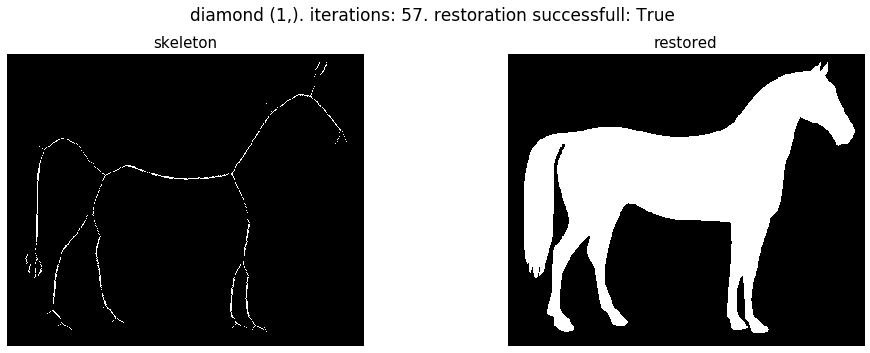

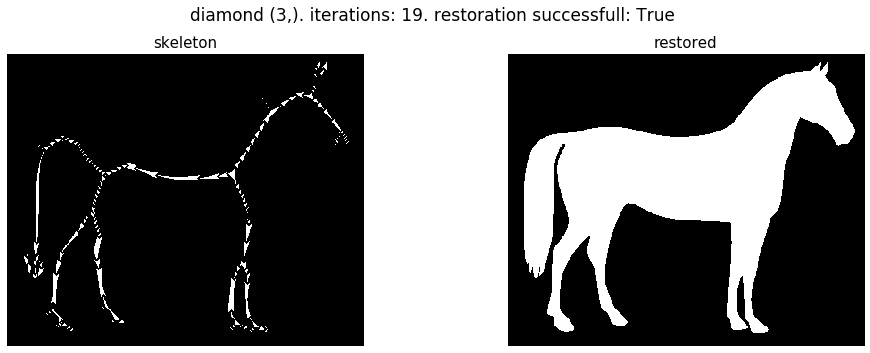

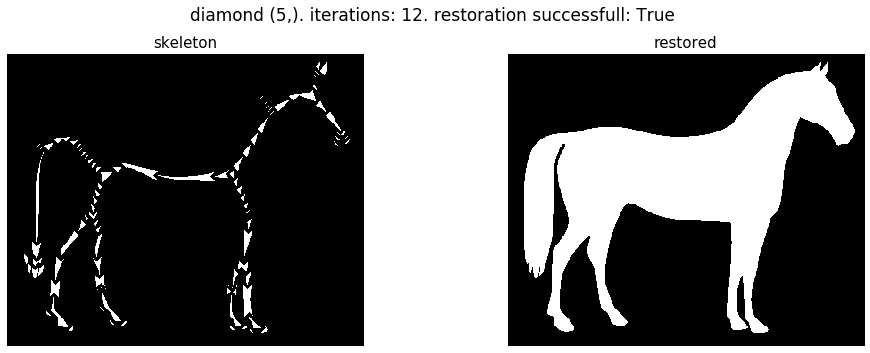

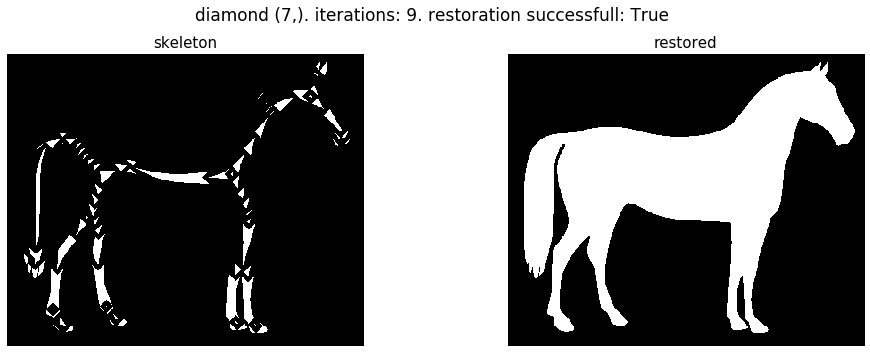

In [16]:
ok = []
for k in range(1, 9, 2):
    success = skeletonize_and_restore(img, morphology.selem.diamond, k)
    ok.append(success)
print(f'all tests succeeded: {all(ok)}')

## disk

all tests succeeded: True


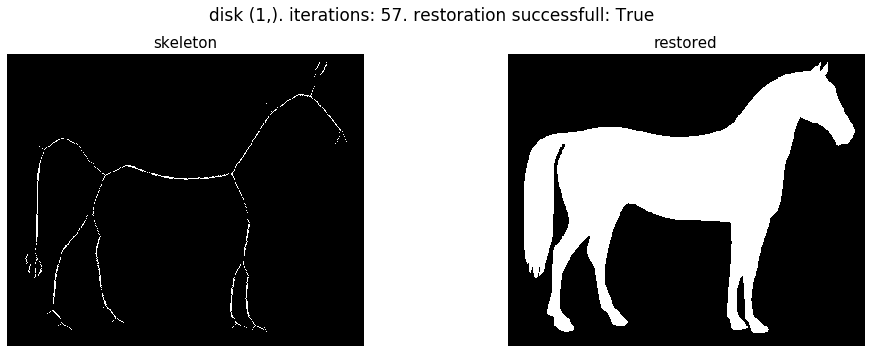

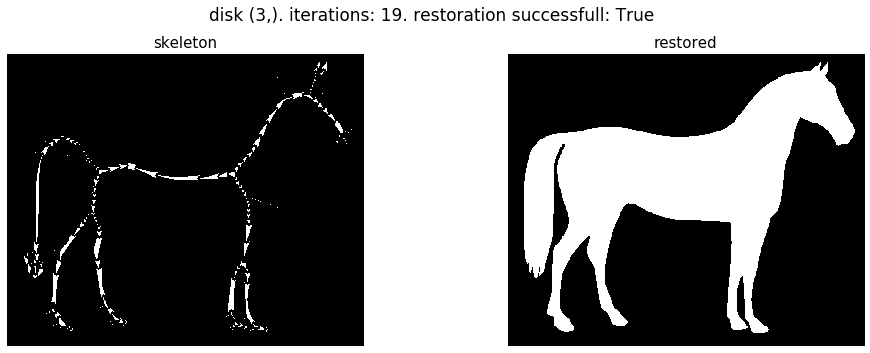

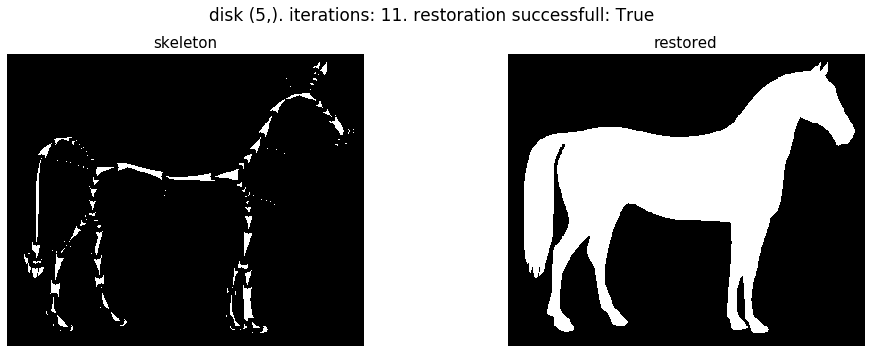

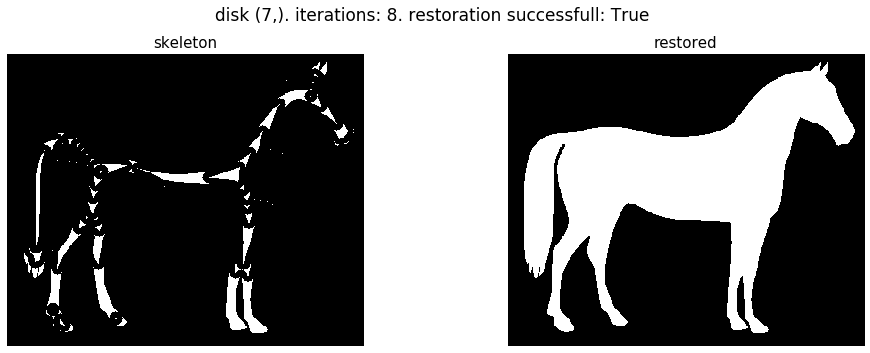

In [17]:
ok = []
for k in range(1, 9, 2):
    success = skeletonize_and_restore(img, morphology.selem.disk, k)
    ok.append(success)
print(f'all tests succeeded: {all(ok)}')

## square

all tests succeeded: True


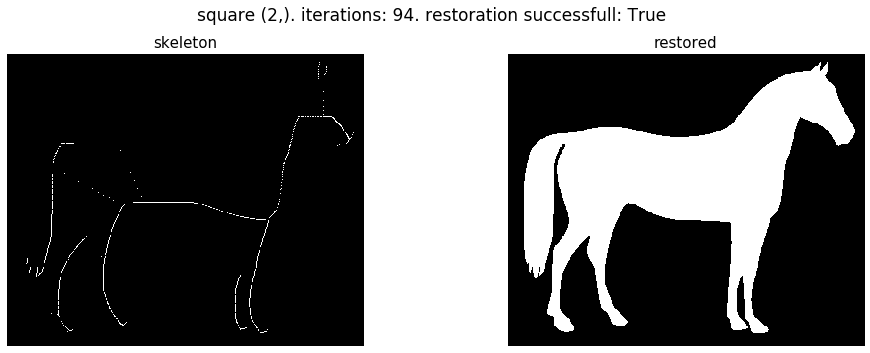

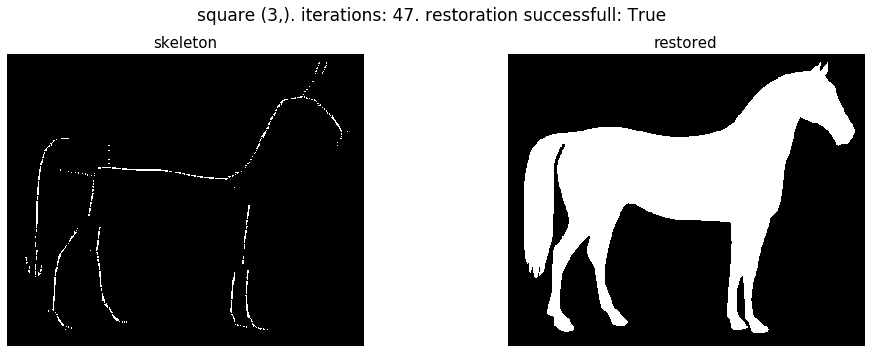

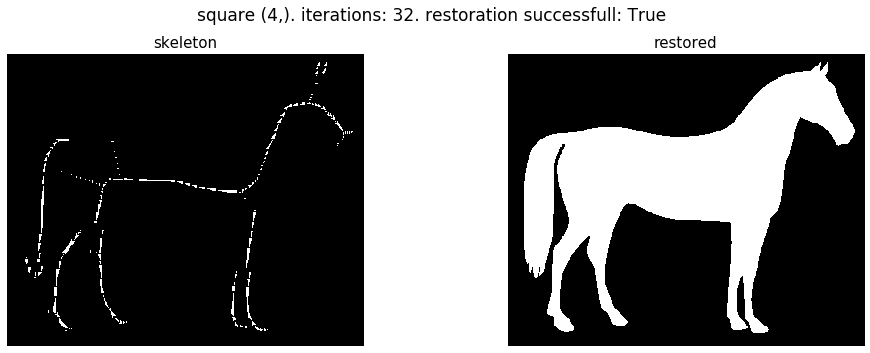

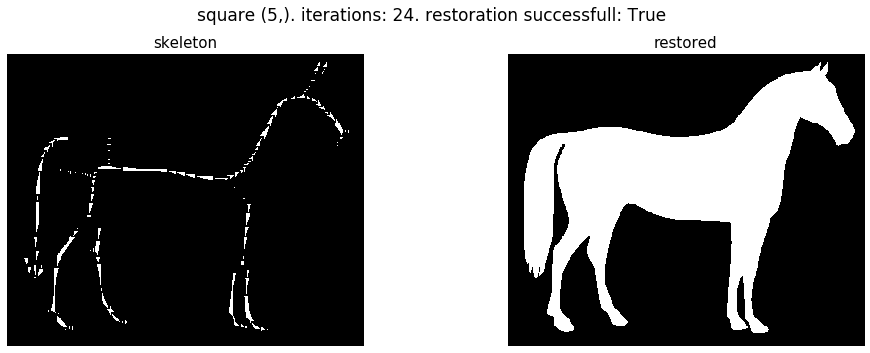

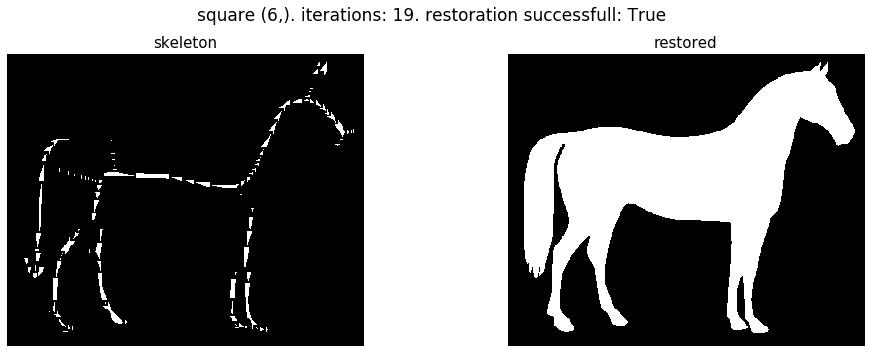

In [18]:
ok = []
for k in range(2, 7, 1):
    success = skeletonize_and_restore(img, morphology.selem.square, k)
    ok.append(success)
print(f'all tests succeeded: {all(ok)}')

## star

all tests succeeded: True


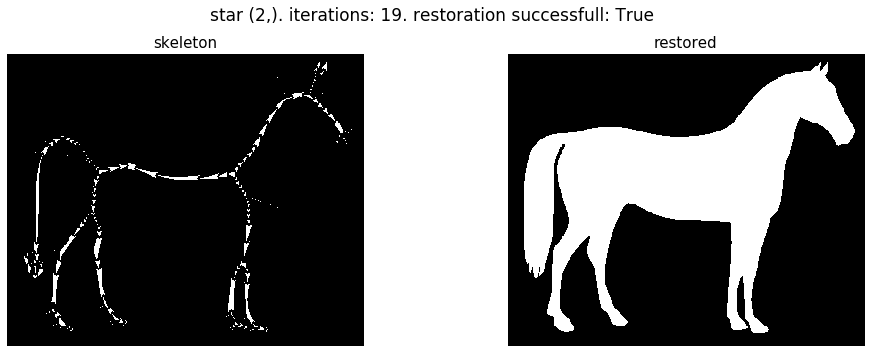

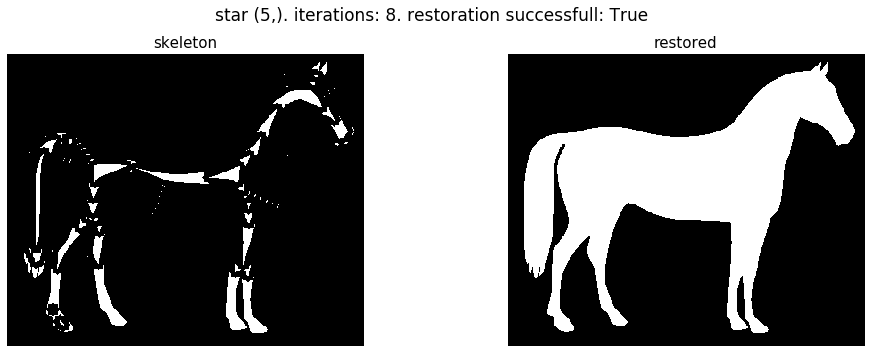

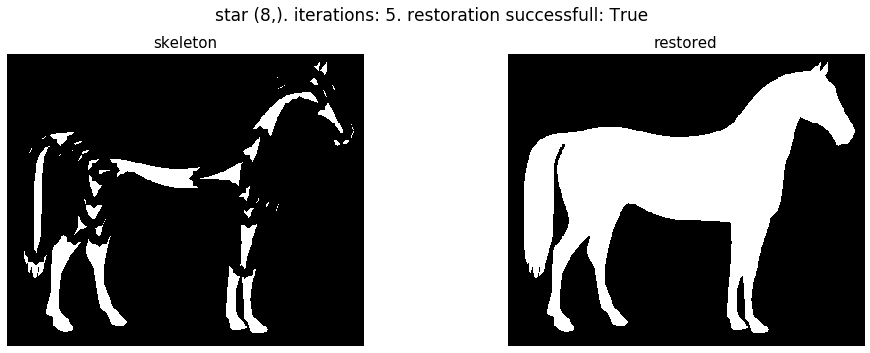

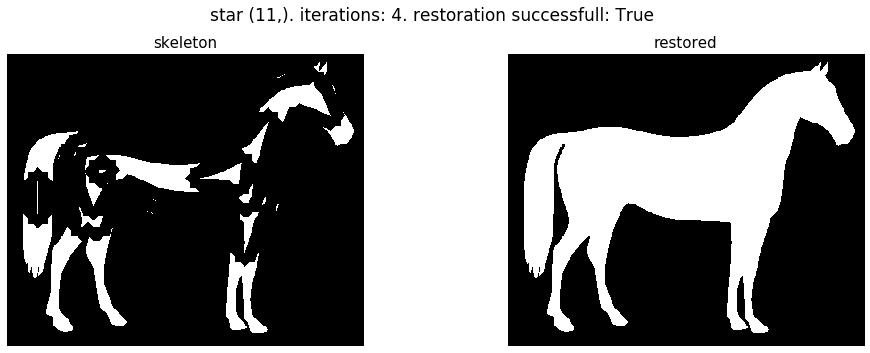

In [19]:
ok = []
for k in range(2, 12, 3):
    success = skeletonize_and_restore(img, morphology.selem.star, k)
    ok.append(success)
print(f'all tests succeeded: {all(ok)}')

## ellipse

all tests succeeded: True


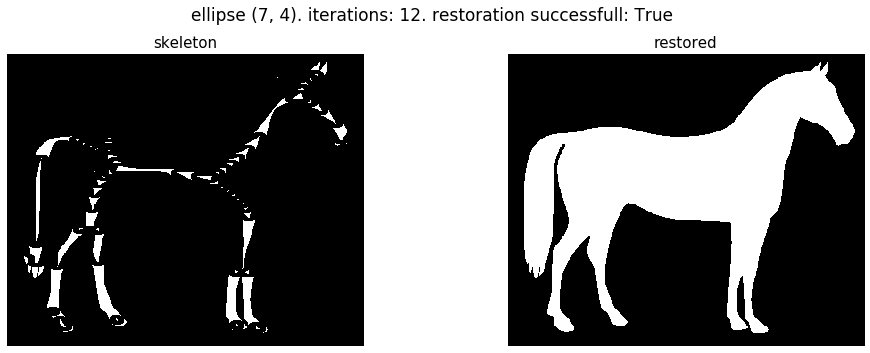

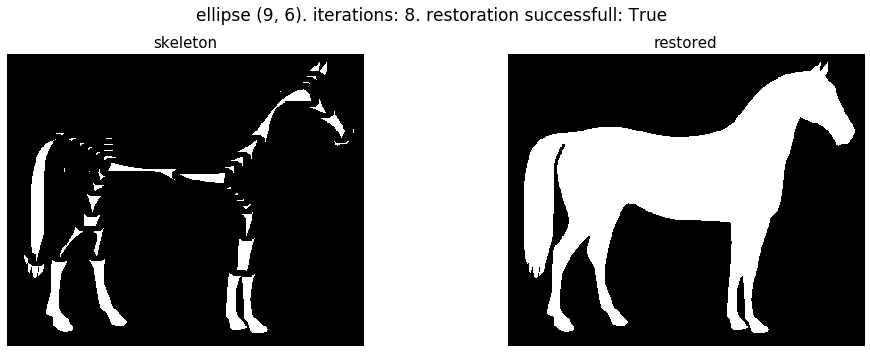

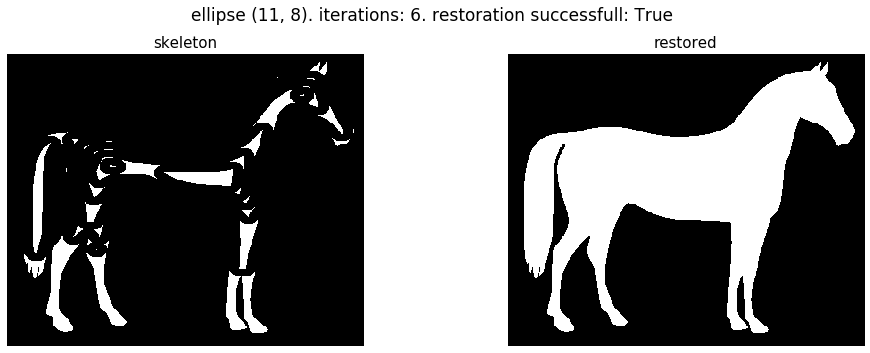

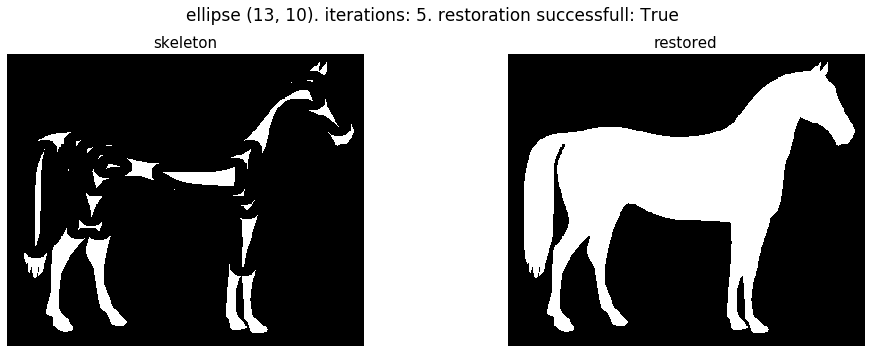

In [20]:
ok = []
for k in range(7, 14, 2):
    success = skeletonize_and_restore(img, morphology.selem.ellipse, k, k - 3)
    ok.append(success)
print(f'all tests succeeded: {all(ok)}')